In [1]:
import numpy as np
from keras.datasets import mnist
from keras import models, layers, activations, optimizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

2024-08-15 14:06:22.762352: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-15 14:06:23.278340: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Load the mnist dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Select randomly 500 samples (50 samples for each class)
selected_train_images = []
selected_train_labels = []

for i in range(10):
    indices = np.where(train_labels == i)[0][:50] # Get 50 indices for each class
    selected_train_images.extend(train_images[indices])
    selected_train_labels.extend(train_labels[indices])

selected_train_images = np.array(selected_train_images)
selected_train_labels = np.array(selected_train_labels)

# Normalize the images
selected_train_images = selected_train_images.reshape(selected_train_images.shape[0], 28, 28, 1) / 255.0

# Convert labels to one-hot encoding
selected_train_labels = to_categorical(selected_train_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Define the 4-fold cross validation
k = 4
num_val_samples = len(selected_train_images) // k
num_epochs = 5
all_histories = []

In [6]:
for i in range(k):
    print(f'Processing fold #{i}')
    val_data = selected_train_images[i * num_val_samples: (i + 1) * num_val_samples]
    val_labels = selected_train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([selected_train_images[:i * num_val_samples],
    selected_train_images[(i + 1) * num_val_samples:]], axis=0)
    partial_train_labels = np.concatenate([selected_train_labels[:i * num_val_samples],
    selected_train_labels[(i + 1) * num_val_samples:]], axis=0)
    model = create_model()
    model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
    history = model.fit(partial_train_data, partial_train_labels,
    epochs=num_epochs, batch_size=64, verbose=1,
    validation_data=(val_data, val_labels))
    all_histories.append(history.history)

Processing fold #0
Epoch 1/5


/home/teamx/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-15 14:10:21.623426: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-15 14:10:21.669066: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/s

1/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.0000e+00 - loss: 2.3356

I0000 00:00:1723720223.990940   69704 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 359ms/step - accuracy: 0.1225 - loss: 2.2293 - val_accuracy: 0.0000e+00 - val_loss: 3.1384
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3219 - loss: 1.8747 - val_accuracy: 0.0000e+00 - val_loss: 3.6883
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5798 - loss: 1.4229 - val_accuracy: 0.0000e+00 - val_loss: 4.4486
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6772 - loss: 1.0046 - val_accuracy: 0.0960 - val_loss: 4.5341
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7807 - loss: 0.7226 - val_accuracy: 0.0880 - val_loss: 5.5388
Processing fold #1
Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.1534 - loss: 2.2312 - val_accuracy: 0.0000e+00 - val_loss: 4.1786
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3201 - loss: 1.8160 - val_accuracy: 0.0720 - val_loss: 5.2644
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5141 - loss: 1.2941 - val_accuracy: 0.1760 - val_

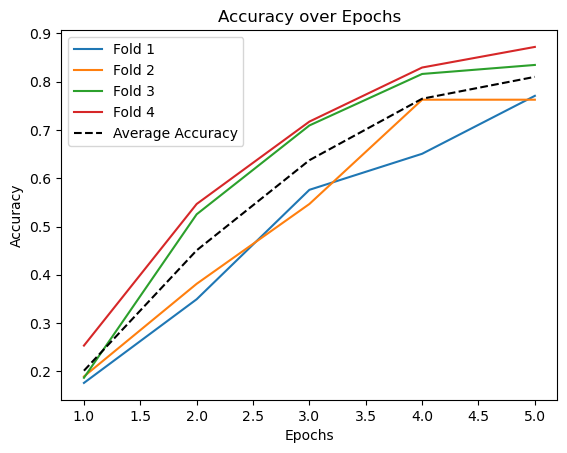

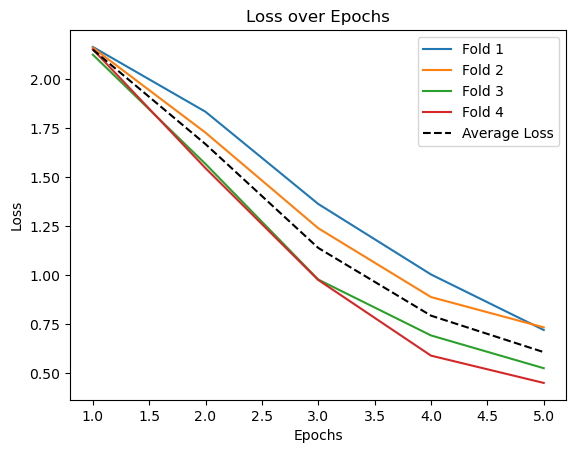

In [7]:
# Plot accuracy
for i, history in enumerate(all_histories):
    plt.plot(range(1, num_epochs + 1), history['accuracy'], label=f'Fold {i+1}')
average_val_acc = np.mean([history['accuracy'] for history in all_histories], axis=0)
plt.plot(range(1, num_epochs + 1), average_val_acc, 'k--', label='Average Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

# Plot loss
for i, history in enumerate(all_histories):
    plt.plot(range(1, num_epochs + 1), history['loss'], label=f'Fold {i+1}')
average_val_loss = np.mean([history['loss'] for history in all_histories], axis=0)

plt.plot(range(1, num_epochs + 1), average_val_loss, 'k--', label='Average Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()